# Model Train

In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [21]:
plt.rcParams['font.family'] = 'NanumSquare'; plt.style.use("ggplot")

## 1. 데이터
- 명사 단위 데이터

In [3]:
data = pd.read_csv("data/NOUN_수정.txt").rename(columns={"Unnamed: 0":"ID"}).dropna() # NA 드랍

## 2. 모델
- gensim Word2Vec - skipgram & cbow

### 카테고리별 모델링

In [6]:
def modelTrain(cat, sg, path):
    if not os.path.exists(path):
        os.mkdir(path) # 모델 저장할 경로 생성
    df = data[data.Category == cat] # 카테고리 필터
    words = [str(x).split(" ") for x in df.Nouns.values] # 훈련용 데이터
    model = Word2Vec(words, window=3, min_count=3, size=100, sg=sg) # 모델 훈련
    model.init_sims(replace=True) # 불필요한 메모리 deload
    filename = cat.replace("/","") # 파일이름 지정
    model.save(f"{path}/{filename}.model") # 모델 저장

In [ ]:
pd.Series(data.Category.unique()).apply(modelTrain, sg=1, path='./models/skipgram') # 카테고리별로 훈련, 저장

In [ ]:
pd.Series(data.Category.unique()).apply(modelTrain, sg=0, path='./models/cbow') # 카테고리별로 훈련, 저장

### 전체 문서 모델링

In [4]:
words = [str(x).split(" ") for x in data.Nouns.values]

In [5]:
model = Word2Vec(words, window=3, min_count=3, size=100, sg=1) # skip-gram 방식으로 모델링
model.init_sims(replace=True) # 불필요한 메모리 deload
model.save("./models/skipgram/total.model")

In [6]:
model = Word2Vec(words, window=3, min_count=3, size=100, sg=0) # cbow 방식으로 모델링
model.init_sims(replace=True) # 불필요한 메모리 deload
model.save("./models/cbow/total.model")

## 3. 결과 정리

- '정의'와 가장 가까운 명사

In [18]:
def loadAndVal(path, topn=50):
    mostSimilar = Word2Vec.load(path).wv.most_similar("정의", topn=topn)
    
    result = pd.DataFrame({
        "model":path.split("/")[-2],
        "category":path.split("/")[-1].split(".")[0],
        "rank":np.arange(1,51),
        "keyword":[word for word, distance in mostSimilar],
        "distance":[distance for word, distance in mostSimilar],
        
        
    })
    
    return result

In [19]:
sgModels = [f"./models/skipgram/{filename}" for filename in os.listdir("./models/skipgram/")]
sgResult = pd.concat(list(pd.Series(sgModels).apply(loadAndVal)))

In [23]:
cbowModels = [f"./models/cbow/{filename}" for filename in os.listdir("./models/cbow/")]
cbowResult = pd.concat(list(pd.Series(cbowModels).apply(loadAndVal)))

In [26]:
pd.concat([sgResult, cbowResult]).to_csv("./정의단어/정의단어.csv", index=False)

In [104]:
pivotTable = words[words.model == 'skipgram'].pivot(index = "rank", columns = "category", values = "keyword")
pivotTable.to_csv("./정의단어/피봇테이블.csv", index= False)

In [105]:
pivotTable

category,total,경제민주화,교통건축국토,기타,농산어촌,문화예술체육언론,미래,반려동물,보건복지,성장동력,안전환경,외교통일국방,육아교육,인권성평등,일자리,저출산고령화대책,정치개혁,행정
rank,,,,,,,,,,,,,,,,,,
1,공의롭,구현,공평,구현,평등,실현,징악,역행,공정,배열,구현,롭다,주창,구현,법앞,공정,롭다,근간
2,롭지못,법앞,구현,실혐될,기강,구현,아난다,범법,민주주의,존중,기강,공정,평등,롭다,롭다,화합,로움,롭다
3,공명정대,평등,롭다,롭다,청탁,계헤,권선,친화력,입각,무방,법치,청렴,공정,준엄,정의롭,칭찬,구현,구현
4,공서,민주화,정의도,법치,약자,불의,체조,전문가,다수결,공감,준엄,균등,진리,첩경,용단,법도,롭지못,법치
5,실혐될,실현,표방,법질서,인권,평등,길임,발달,초석,이념,의글,표현의자유,숙의,공명정대,평등,분노,공정사회,반칙
6,공정,반칙,평등,실현,응원,정의롭,이타,도고,바름,공평,지엄,중책,구현,실현,공평,진정,정의도,공정사회
7,정의롭,경제민주화,법치국가,준엄,현명,깨끗,법위,방해,우위,질서,법치국가,민주주의,백과사전,헬조선,구현,시각,공정,실현
8,무너뜨렸다,구호,반칙,민주주의,공감,롭다,악습,침,다복,신념,악인,평등,정치가,정의도,공정,여론,법치,환골탈태
9,참되고,사회인,정녕,박애,존엄,희희낙락,군림,탁상,회연,법치,수호,체성,승리,정의롭,법치국가,슬로건,루니,한국판


## 4. 결과 분석

In [2]:
words = pd.read_csv("정의단어/정의단어.csv")

In [41]:
def countWords(model):
    plt.figure(figsize = (10,4)); plt.xticks(rotation=25)
    df = words[words.model == model]
    p = sns.barplot(data = df.keyword.value_counts().reset_index().head(20), x = 'index', y = 'keyword')
    plt.xlabel("Keywords"); plt.ylabel("freq")
    return p

농산어촌, 성장동력을 제외한 모든 카테고리에서 '공정' 이라는 키워드가 50위 이내에서 검출되었다. '공정'과 유사한 단어인 공정사회, 공명정대, 공평 등도 여러 카테고리에서 검출되었다.

AxesSubplot(0.125,0.125;0.775x0.755)


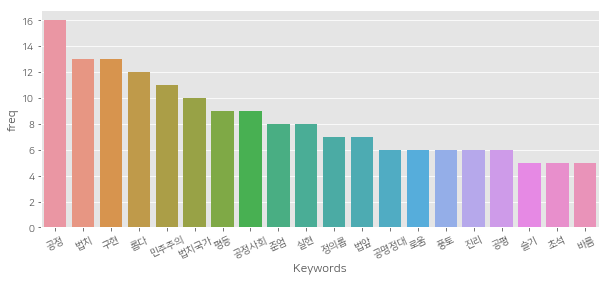

In [42]:
print(countWords('skipgram'))

In [58]:
set(words.category.unique()) - set(words[(words.model == 'skipgram') & (words.keyword == '공정')].category.values)

{'농산어촌', '성장동력'}